# Import Library

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import stanza
import re
import string
import nltk
import h5py
import tensorflow as tf
%matplotlib inline

# Exploratory Data Analysis

In [41]:
df_data = pd.read_csv('data/data_raw.csv')

df_data.head() 

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

In [42]:
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53044 entries, 0 to 53043
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53042 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB
None


In [43]:
df_data.shape

(53044, 2)

In [44]:
# Data kosong
df_data.isnull().sum()

statement    363
status         2
dtype: int64

In [45]:
# Hapus data kosong
df_data.dropna(inplace = True)
df_data.isnull().sum()

statement    0
status       0
dtype: int64

In [46]:
# Cek duplikat data
duplicate_rows = df_data[df_data.duplicated()]
print("cek awal: ", duplicate_rows.shape)

# Hapus data duplikat
df_data = df_data.drop_duplicates()
print("setelah dihapus: ", df_data.shape)

cek awal:  (1592, 2)
setelah dihapus:  (51088, 2)


In [47]:
# hapus data >600 karakter
df_data = df_data[df_data['statement'].apply(len) <= 600]

In [48]:
df_data.shape

(35288, 2)

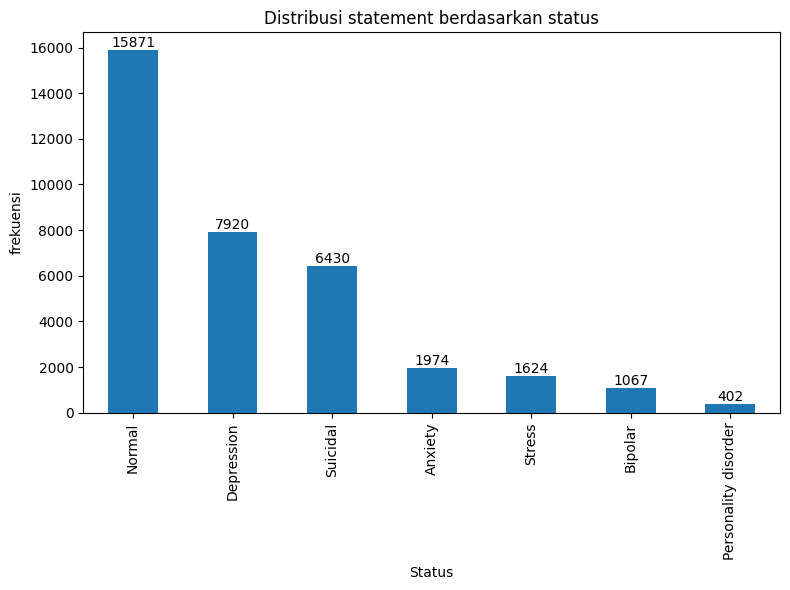

In [49]:
plt.figure(figsize=(8,6))

# get the unique status values and their counts
status_counts = df_data['status'].value_counts()

# create the bar plot
ax = status_counts.plot(kind='bar')

# add the count labels on top of each bar
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Distribusi statement berdasarkan status')
plt.xlabel('Status')
plt.ylabel('frekuensi')
plt.tight_layout()
plt.show() 

In [50]:
df_data.head()

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

In [51]:
# from deep_translator import GoogleTranslator
# from tqdm import tqdm

# # Inisialisasi translator
# translator = GoogleTranslator(source='en', target='id')

# # Fungsi untuk menerjemahkan teks dengan penanganan error
# def translate_text(text):
#     try:
#         return translator.translate(text)
#     except Exception as e:
#         print(f"Error translating text: {text}\nError: {e}")
#         return text  # Kembalikan teks asli jika terjadi error

# # Menggunakan tqdm untuk menampilkan progress bar
# tqdm.pandas()

# # Terapkan fungsi translate ke kolom 'statement'
# df_data['translated_statement'] = df_data['statement'].progress_apply(translate_text)

# df_data.to_csv('data_hasil_translate.csv', index=False)

# df_data.head()

In [52]:
df_data = pd.read_csv('data/data_hasil_translate_30k.csv')
df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  
0                                           Ya ampun  
1  susah tidur, pikiran kacau, hati gelisah. Semu...  
2  Semua salah, mundurlah sayang, maju terus ragu...  
3  Aku mengalihkan fokusku ke hal lain tapi aku m...  
4  Aku gelisah dan gelisah, sudah sebulan sekaran...

In [53]:
word_count = df_data['translated_statement'].apply(lambda x: len(x.split()))
max_word_count = word_count.max()

print(f"word count tertinggi: {max_word_count}")

word count tertinggi: 133


In [54]:
# Gabungkan semua teks di kolom 'statement' menjadi satu string
all_words = " ".join(df_data['translated_statement'])

# Tokenisasi dan hitung kata unik
unique_words = set(all_words.split())
unique_word_count = len(unique_words)

# Menampilkan hasil
print(f"Jumlah kata unik: {unique_word_count}")

Jumlah kata unik: 65908


In [55]:
from nltk.tokenize import word_tokenize
# Tokenisasi
tokenisasi = df_data['translated_statement'].apply(word_tokenize)

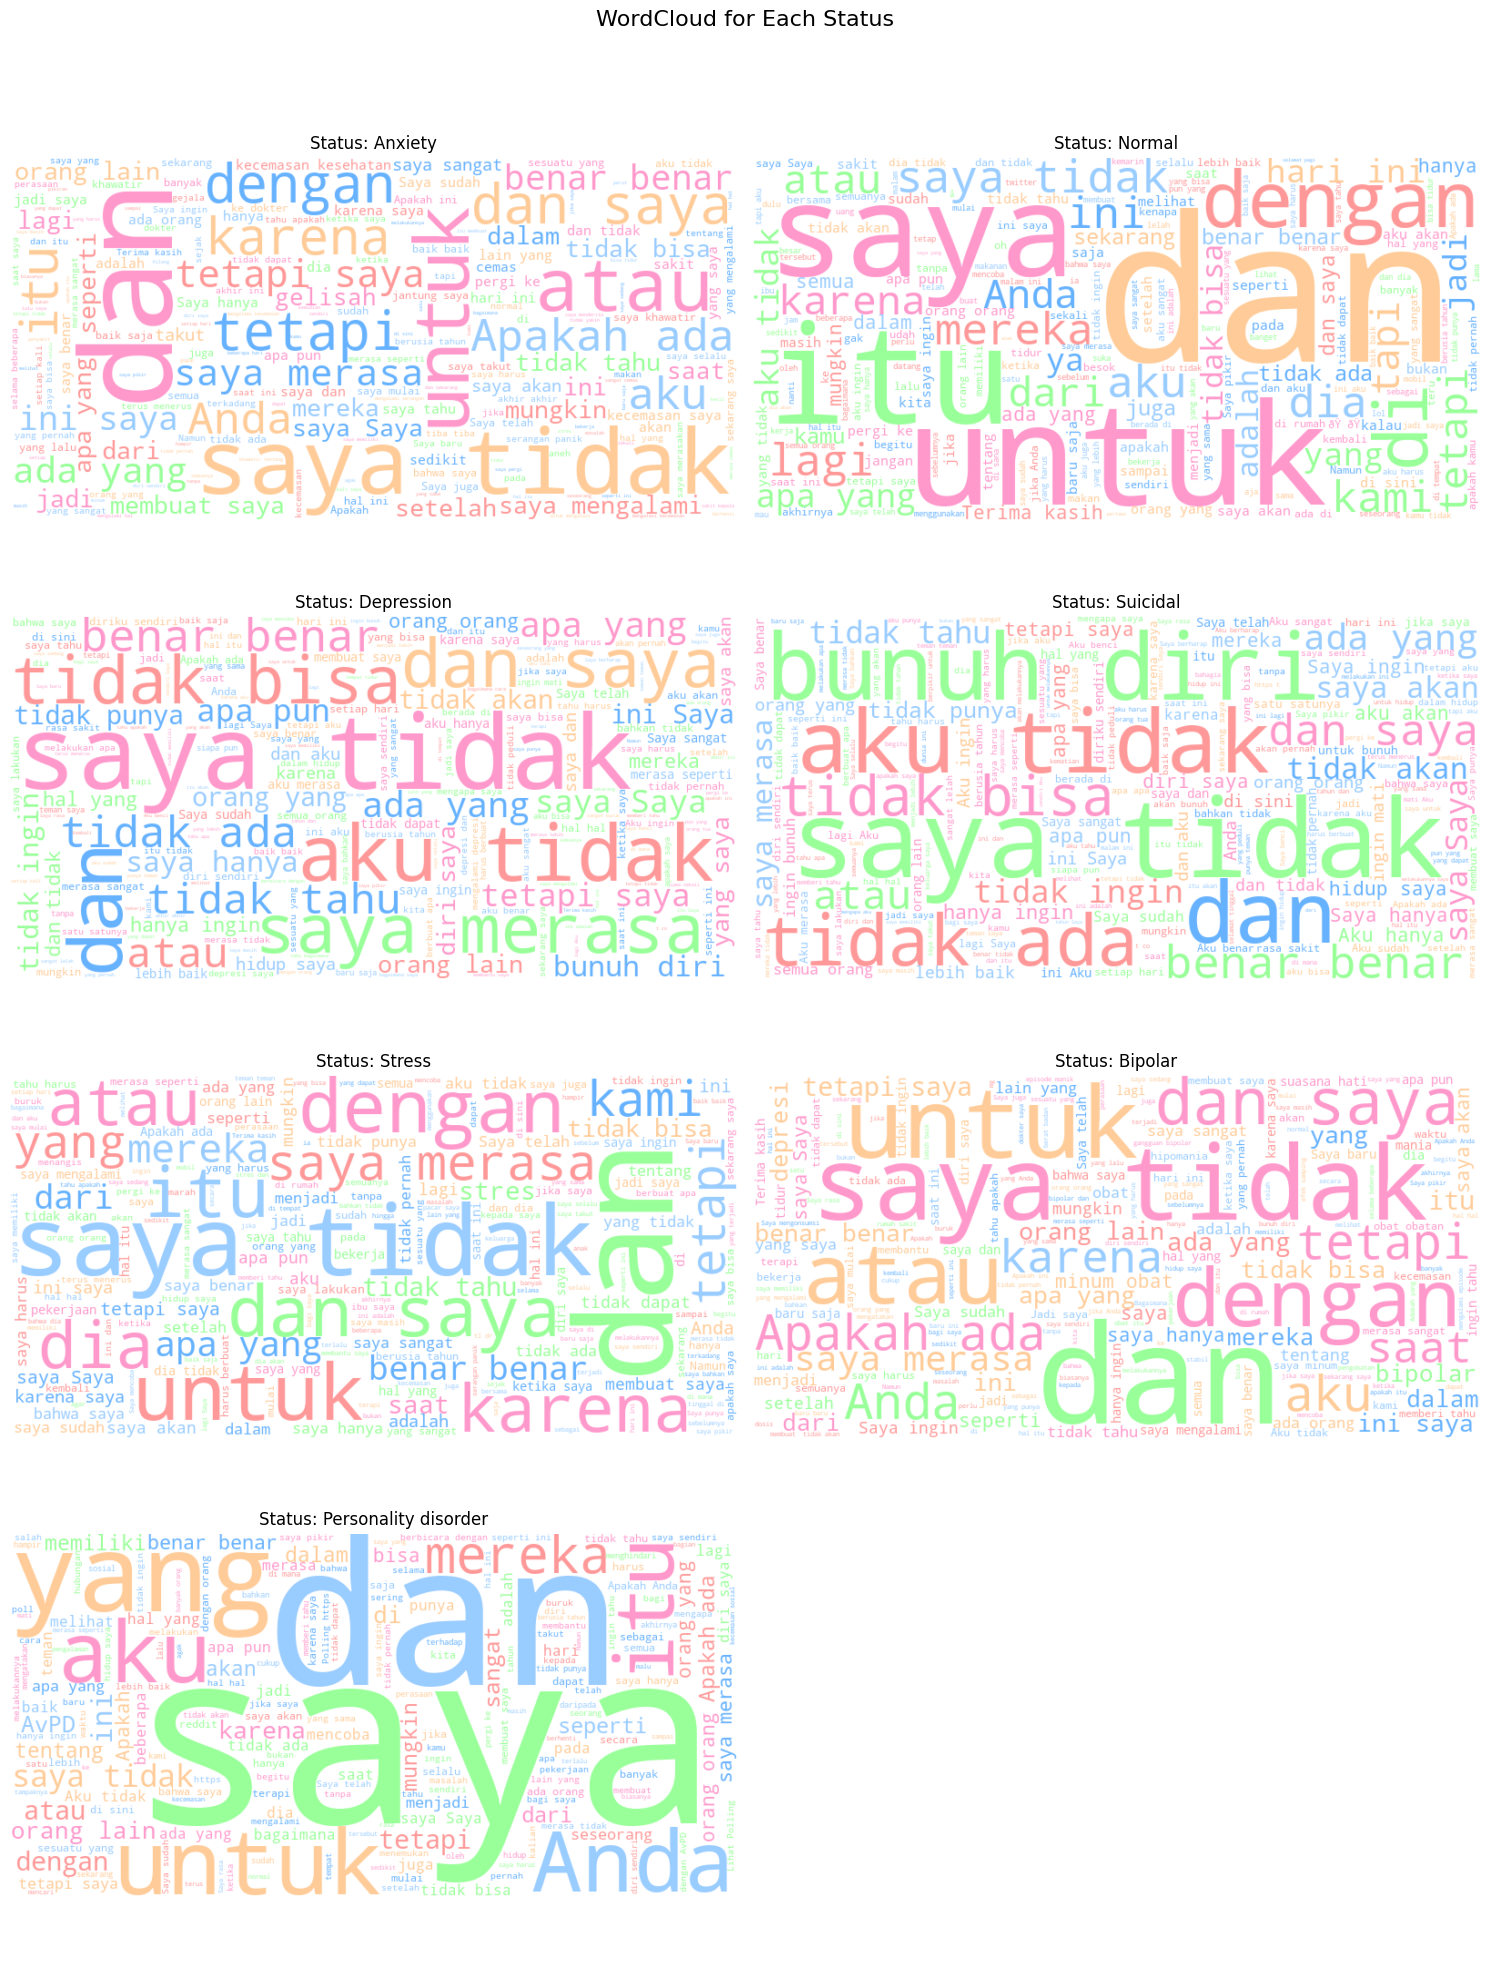

In [56]:
from wordcloud import WordCloud

# Ambil kategori unik dari kolom 'status'
statuses = df_data['status'].unique()

# Tentukan daftar warna untuk WordCloud
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']

# Fungsi untuk menentukan warna
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(colors)

# Buat subplots (4 baris x 2 kolom)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('WordCloud for Each Status', fontsize=16)  # Judul utama

# Iterasi untuk setiap status
for i, status in enumerate(statuses):
    # Gabungkan tokenisasi untuk status saat ini
    tokens_data = ' '.join([' '.join(token) for token, label in zip(tokenisasi, df_data['status']) if label == status])

    # Buat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Tentukan posisi subplot (baris dan kolom)
    row = i // 2  # Baris
    col = i % 2   # Kolom

    # Plot WordCloud ke subplot
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].axis('off')  # Matikan axis
    axes[row, col].set_title(f'Status: {status}', fontsize=12)

# Sembunyikan subplot yang tidak terpakai
if len(statuses) % 2 != 0:  # Jika jumlah status ganjil
    axes[-1, -1].axis('off')

# Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [57]:
df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  
0                                           Ya ampun  
1  susah tidur, pikiran kacau, hati gelisah. Semu...  
2  Semua salah, mundurlah sayang, maju terus ragu...  
3  Aku mengalihkan fokusku ke hal lain tapi aku m...  
4  Aku gelisah dan gelisah, sudah sebulan sekaran...

In [58]:
df_data.to_csv('data/data_hasil_EDA.csv', index=False)

# Pre-Processing

In [59]:
df_data = pd.read_csv('data/data_hasil_EDA.csv')
# df_data.shape
df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  
0                                           Ya ampun  
1  susah tidur, pikiran kacau, hati gelisah. Semu...  
2  Semua salah, mundurlah sayang, maju terus ragu...  
3  Aku mengalihkan fokusku ke hal lain tapi aku m...  
4  Aku gelisah dan gelisah, sudah sebulan sekaran...

In [60]:
vocab_size = 65908

In [61]:
# 0. Cleaning Text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]\(.*?\)', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text)

    return text

In [62]:
# 1. Convert text to lowercase
def to_lower(text):
    return text.lower()

In [63]:
# 2. Remove stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

# List stopword tambahan
manual_stopwords = {"aku", "kamu", "dia", "mereka", "kita", "kami", "mu", "ku", "nya", "itu", "ini", "sini", "situ", "sana", "begitu", "yaitu", "yakni", 
                    "walaupun", "meskipun", "agar", "biar", "supaya", "akan", "telah", "baru", "lagi", "masih", "sekarang", "tadi", "kemarin", "nanti", 
                    "besok", "lalu", "kemudian", "sambil", "serta", "tetapi", "melainkan", "sehingga", "sebab", "karena", "hanya", "saja", "justru", "bahkan", 
                    "memang", "kan", "lah", "pun", "dong", "lho", "kok", "deh", "ya", "nah", "aduh", "oh", "eh", "loh", "seperti", "bagai", "bagaikan", 
                    "umpama", "ibarat", "laksana", "anda", "gua", "elo", "dong", "toh", "lagi", "apalagi", "yang", "untuk", "ke", "dari", "pada", "dengan", 
                    "oleh", "tanpa", "antara", "di", "sebuah", "seorang", "para", "bagi", "atas", "dalam", "namun", "demikian", "juga", "malah", "malahan", 
                    "berikut", "tersebut", "jadi", "adalah", "sebagai", "bukan", "tidak", "iya", "nggak", "ga", "enggak", "sangat", "paling", "amat", "cukup", 
                    "lebih", "kurang", "begitu", "maupun", "apalagi", "misalnya", "sekalipun", "meski", "ketika", "dimana", "siapa", "apa", "kapan", "bagaimana", 
                    "selain", "setelah", "sebelum", "sesudah", "hingga", "selama", "sementara", "sampai", "kemana", "darimana", "kenapa", "mengapa",
                    "wkwk", "haha", "hehe", "hihi", "loh", "yah", "udah", "aja", "banget", "abis", "gitu", "tau", "doang", "nih", "tuh", "kayak", "ngapain", 
                    "nggak", "ngga", "yaudah", "yaelah", "anjay", "anjir", "ciyee", "btw", "cmiiw", "gw", "gua", "gue", "gak", "sih", "loh", "dong", "malah", 
                    "makanya", "kenapa", "ngapain", "apaan", "mau", "ye", "cie", "ciee", "oke", "ok", "sip", "bro", "sis", "mantul", "tapi", "emang", "ya", 
                    "masa", "sumpah", "padahal", "daripada", "udah", "ntar", "yaudah", "bang", "cek", "makasih", "terus", "anj", "kalo", "ntar", "sama", 
                    "soalnya", "jangan", "kek", "kayaknya", "lah", "masih", "eh", "gak", "loh", "kan"
                    }

stop_words.update(manual_stopwords)

# Fungsi untuk menghapus stopword
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [64]:
# 3. Lemmatization
nlp = stanza.Pipeline('id', processors='tokenize,lemma', use_gpu=False)

# Fungsi lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    sentences = []

    # Iterasi setiap kalimat dalam dokumen yang sudah diproses
    for sentence in doc.sentences:
        lemmas = [word.lemma for word in sentence.words]
        sentences.append(' '.join(lemmas))

    return ' '.join(sentences)

2024-12-01 16:33:31 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-12-01 16:33:31 INFO: Downloaded file to C:\Users\RafiAchmadfr\stanza_resources\resources.json
2024-12-01 16:33:31 WARNING: Language id package default expects mwt, which has been added
2024-12-01 16:33:31 INFO: Loading these models for language: id (Indonesian):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| lemma     | gsd_nocharlm |

2024-12-01 16:33:31 INFO: Using device: cpu
2024-12-01 16:33:31 INFO: Loading: tokenize
c:\Users\RafiAchmadfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the defau

In [65]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm

tqdm.pandas(desc="Preprocessing Text")
def preprocessing_text(text_raw):
    # Cleaning
    text_raw = clean_text(text_raw)
    
    # Convert to lowercase
    text_raw = to_lower(text_raw)
    
    # Remove stopwords
    text_raw = remove_stopwords(text_raw)
    
    # Lemmatize
    text_preprocessing = lemmatize_text(text_raw)
    
    # Tokenized
    text_tokenized = word_tokenize(str(text_preprocessing))

    return text_preprocessing, text_tokenized

In [66]:
# df_data[['preprocessed_text', 'tokenized_text']] = df_data['translated_statement'].progress_apply(preprocessing_text).apply(pd.Series)
# df_data.head()

In [67]:
# word_count = df_data['preprocessed_text'].apply(lambda x: len(x.split()))
# max_word_count = word_count.max()

# print(f"word count tertinggi: {max_word_count}")

In [68]:
# df_data.to_csv('data/data_hasil_prepos.csv', index=False)

# Pre-Trained Word2Vector

In [69]:
vocab_size = 65908
embedding_dim = 100
max_sequence_length = 100

In [70]:
df_data = pd.read_csv('data/data_hasil_prepos.csv')

df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  \
0                                           Ya ampun   
1  susah tidur, pikiran kacau, hati gelisah. Semu...   
2  Semua salah, mundurlah sayang, maju terus ragu...   
3  Aku mengalihkan fokusku ke hal lain tapi aku m...   
4  Aku gelisah dan gelisah, sudah sebulan sekaran...   

                                   preprocessed_text  \
0                                              ampun   
1  susah tidur pikir kacau hati gelisah semua tak...   
2  semua salah mundur lah sayang maju ragu tetapl...   
3                              alih fokusku khawatir   
4                 gelisah gelisah sebul nak maksudmu   

                                      tokenized_text  
0                                          ['ampun']  
1  ['susah', 'tidur', 'pikir', 'kacau', 'hati', '...  
2  ['semua', 'salah', 'mundur', 'lah', 'sayang', ...  
3                    ['alih', 'fokusku', 'khawatir']  
4  ['gelisah', 'gelisah', 'sebul', 'nak', 'maksud...

In [71]:
from nltk.tokenize import word_tokenize

df_data['tokenized_text'] = df_data['preprocessed_text'].astype(str).apply(word_tokenize)

In [72]:
df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  \
0                                           Ya ampun   
1  susah tidur, pikiran kacau, hati gelisah. Semu...   
2  Semua salah, mundurlah sayang, maju terus ragu...   
3  Aku mengalihkan fokusku ke hal lain tapi aku m...   
4  Aku gelisah dan gelisah, sudah sebulan sekaran...   

                                   preprocessed_text  \
0                                              ampun   
1  susah tidur pikir kacau hati gelisah semua tak...   
2  semua salah mundur lah sayang maju ragu tetapl...   
3                              alih fokusku khawatir   
4                 gelisah gelisah sebul nak maksudmu   

                                      tokenized_text  
0                                            [ampun]  
1  [susah, tidur, pikir, kacau, hati, gelisah, se...  
2  [semua, salah, mundur, lah, sayang, maju, ragu...  
3                          [alih, fokusku, khawatir]  
4           [gelisah, gelisah, sebul, nak, maksudmu]

In [73]:
sentences = df_data['tokenized_text'].tolist()
print(sentences)

[['ampun'], ['susah', 'tidur', 'pikir', 'kacau', 'hati', 'gelisah', 'semua', 'tak', 'selaras'], ['semua', 'salah', 'mundur', 'lah', 'sayang', 'maju', 'ragu', 'tetaplah', 'tempat', 'gelisah', 'tak', 'tenang'], ['alih', 'fokusku', 'khawatir'], ['gelisah', 'gelisah', 'sebul', 'nak', 'maksudmu'], ['istirahat', 'degdegan', 'janggal', 'gimana'], ['rasa', 'takut', 'cemas', 'laku', 'semoga', 'keluarga', 'semua', 'lindung'], ['pernah', 'kah', 'rasa', 'gugup', 'tahu'], ['hari', 'tidur', 'nyenyak', 'gelisah'], ['benarbenar', 'khawatir', 'tangis'], ['selalu', 'gelisah', 'tiap', 'malam', 'aneh'], ['bingung', 'akhirakhir', 'badan', 'enak', 'badan', 'tiap', 'tidur', 'badan', 'selalu', 'gelisah'], ['terkadang', 'butuh', 'masalah', 'tertawa', 'lupa', 'kalau', 'masalah', 'ingat', 'dia', 'gelisah', 'ternyata', 'punya', 'beban', 'sedih', 'bla', 'bla', 'bla'], ['kekhawatiran'], ['terkadang', 'pikir', 'kamu', 'sendiri', 'lah', 'buat', 'kamu', 'cemas', 'takut', 'pejam', 'mata', 'tidur'], ['bangun', 'tidur', 

In [74]:
# Latih model Word2Vec
from gensim.models import Word2Vec

word2vec_model = Word2Vec(sentences, 
                          vector_size=max_sequence_length, 
                          window=10, 
                          min_count=1, 
                          workers=4)

In [75]:
# Simpan Word2Vec model
word2vec_model.save("model_word2vec/word2vec_model_MentalQ.model")

# Simpan embedding ke file .h5
save_h5 = "model_word2vec/word2vec_model_MentalQ.h5"

with h5py.File(save_h5, "w") as h5file:
    h5file.create_dataset("vocab", data=word2vec_model.wv.index_to_key, dtype=h5py.string_dtype(encoding='utf-8'))
    h5file.create_dataset("vectors", data=word2vec_model.wv.vectors)

In [76]:
# Buat word_index dari Word2Vec
word_index = {word: i + 1 for i, word in enumerate(word2vec_model.wv.index_to_key)}

# Buat embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [77]:
# Fungsi untuk mengonversi token menjadi indeks
def text_to_sequence(tokens, word_index):
    return [word_index[word] for word in tokens if word in word_index]

# Ubah kolom 'tokenized' menjadi sequence
df_data['sequence'] = df_data['tokenized_text'].apply(lambda x: text_to_sequence(x, word_index))
df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  \
0                                           Ya ampun   
1  susah tidur, pikiran kacau, hati gelisah. Semu...   
2  Semua salah, mundurlah sayang, maju terus ragu...   
3  Aku mengalihkan fokusku ke hal lain tapi aku m...   
4  Aku gelisah dan gelisah, sudah sebulan sekaran...   

                                   preprocessed_text  \
0                                              ampun   
1  susah tidur pikir kacau hati gelisah semua tak...   
2  semua salah mundur lah sayang maju ragu tetapl...   
3                              alih fokusku khawatir   
4                 gelisah gelisah sebul nak maksudmu   

                                      tokenized_text  \
0                                            [ampun]   
1  [susah, tidur, pikir, kacau, hati, gelisah, se...   
2  [semua, salah, mundur, lah, sayang, maju, ragu...   
3                          [alih, fokusku, khawatir]   
4           [gelisah, gelisah, sebul, nak, maksudmu]   

                                            sequence  
0                                             [1047]  
1         [1203, 36, 11, 245, 98, 257, 9, 157, 4833]  
2  [9, 64, 1305, 74, 264, 371, 656, 1702, 58, 257...  
3                                  [441, 12204, 118]  
4                        [257, 257, 443, 7635, 8037]

In [78]:
# Padding sequence agar semua memiliki panjang yang sama
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(df_data['sequence'], maxlen=max_sequence_length, padding='post')
print(padded_sequence)

[[1047    0    0 ...    0    0    0]
 [1203   36   11 ...    0    0    0]
 [   9   64 1305 ...    0    0    0]
 ...
 [  33  187  743 ...    0    0    0]
 [ 250  275   33 ...    0    0    0]
 [  47   10  146 ...    0    0    0]]


In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
status_encoded = label_encoder.fit_transform(df_data['status'])
print(status_encoded)

[0 0 0 ... 0 0 0]


In [80]:
print("label:", label_encoder.classes_)

for encoded_value, class_label in zip(range(len(label_encoder.classes_)), label_encoder.classes_):
    print(f"Encoded value {encoded_value} -> label '{class_label}'")

label: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']
Encoded value 0 -> label 'Anxiety'
Encoded value 1 -> label 'Bipolar'
Encoded value 2 -> label 'Depression'
Encoded value 3 -> label 'Normal'
Encoded value 4 -> label 'Personality disorder'
Encoded value 5 -> label 'Stress'
Encoded value 6 -> label 'Suicidal'


In [81]:
# Menyimpan kelas dari LabelEncoder
np.save('data/label_encoding.npy', label_encoder.classes_)

# Data Preparation

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequence,
                                                    status_encoded,
                                                    test_size=0.2,
                                                    random_state=60,
                                                    stratify=status_encoded
                                                    )

In [83]:
print(f'X train: {X_train.shape}\n{X_train}\n')
print(f'X test: {X_test.shape}\n{X_test}\n')
print(f'y train: {y_train.shape}\n{y_train}\n')
print(f'y test: {y_test.shape}\n{y_test}')

X train: (28230, 100)
[[1761  126  969 ...    0    0    0]
 [  52  217 5926 ...    0    0    0]
 [ 267   22  511 ...    0    0    0]
 ...
 [ 294    0    0 ...    0    0    0]
 [ 115  231   25 ...    0    0    0]
 [ 221  221  318 ...    0    0    0]]

X test: (7058, 100)
[[  394 22294   358 ...     0     0     0]
 [   10    18   315 ...     0     0     0]
 [ 1934   316    29 ...     0     0     0]
 ...
 [14675   941     0 ...     0     0     0]
 [ 1709  3030   980 ...     0     0     0]
 [  227   961    39 ...     0     0     0]]

y train: (28230,)
[3 3 6 ... 3 2 3]

y test: (7058,)
[5 6 2 ... 3 2 5]


In [84]:
# Data distribusi di dataset awal
print("Distribusi dataset awal:")
print(pd.Series(status_encoded).value_counts(normalize=True))

# Data distribusi di training set
print("\nDistribusi di training set:")
print(pd.Series(y_train).value_counts(normalize=True))

# Data distribusi di testing set
print("\nDistribusi di testing set:")
print(pd.Series(y_test).value_counts(normalize=True))

Distribusi dataset awal:
3    0.449756
2    0.224439
6    0.182215
0    0.055940
5    0.046021
1    0.030237
4    0.011392
Name: proportion, dtype: float64

Distribusi di training set:
3    0.449770
2    0.224442
6    0.182217
0    0.055933
5    0.046015
1    0.030216
4    0.011406
Name: proportion, dtype: float64

Distribusi di testing set:
3    0.449702
2    0.224426
6    0.182205
0    0.055965
5    0.046047
1    0.030320
4    0.011335
Name: proportion, dtype: float64


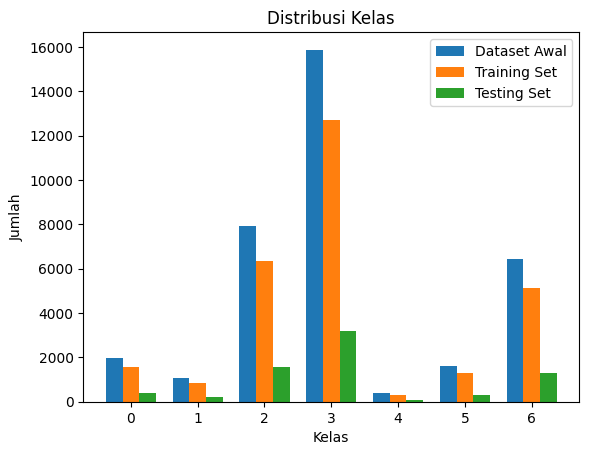

In [85]:
# Hitung distribusi kelas
classes, counts_full = np.unique(status_encoded, return_counts=True)
_, counts_train = np.unique(y_train, return_counts=True)
_, counts_test = np.unique(y_test, return_counts=True)

# Plot distribusi
bar_width = 0.25
x = np.arange(len(classes))

plt.bar(x - bar_width, counts_full, width=bar_width, label="Dataset Awal")
plt.bar(x, counts_train, width=bar_width, label="Training Set")
plt.bar(x + bar_width, counts_test, width=bar_width, label="Testing Set")

plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.title("Distribusi Kelas")
plt.xticks(x, classes)
plt.legend()
plt.show()

# Modeling

In [86]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [93]:
def create_model():
    model = Sequential([
        # Embedding Layer
        Embedding(input_dim=len(word_index) + 1, 
                  output_dim=embedding_dim, 
                  weights=[embedding_matrix], 
                  trainable=True),

        # Bidirectional LSTM Layer
        Bidirectional(LSTM(256,
                           kernel_regularizer=l2(0.0005),
                           return_sequences=False)),
        Dropout(0.1),
        BatchNormalization(),
        
        # Dense Layer 1
        Dense(48, activation='tanh'),
        Dropout(0.5),
        BatchNormalization(),
        
        # Dense Layer 2
        Dense(16, activation='tanh'),
        Dropout(0.1),
        BatchNormalization(),
        
        # Output Layer
        Dense(7, activation='softmax')
    ])

    # Compile model dengan learning rate yang ditemukan oleh tuner
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])
    
    return model

In [94]:
# Callbacks
early_stopping_overfitting = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Hitung class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

In [95]:
model = create_model()

# Train & Evaluasi Model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=21,
    batch_size=32,
    callbacks=[reduce_lr],
    class_weight=class_weights
)

Epoch 1/21
883/883 ━━━━━━━━━━━━━━━━━━━━ 126s 138ms/step - loss: 2.1305 - sparse_categorical_accuracy: 0.3172 - val_loss: 1.4071 - val_sparse_categorical_accuracy: 0.5307 - learning_rate: 1.0000e-04
Epoch 2/21
883/883 ━━━━━━━━━━━━━━━━━━━━ 124s 141ms/step - loss: 1.7041 - sparse_categorical_accuracy: 0.4662 - val_loss: 1.3218 - val_sparse_categorical_accuracy: 0.5656 - learning_rate: 1.0000e-04
Epoch 3/21
  7/883 ━━━━━━━━━━━━━━━━━━━━ 1:49 126ms/step - loss: 1.9026 - sparse_categorical_accuracy: 0.4769

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     2,791,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 512)            │       731,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │        24,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,649,399 (40.62 MB)

 Trainable params: 3,549,415 (13.54 MB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 7,098,832 (27.08 MB)

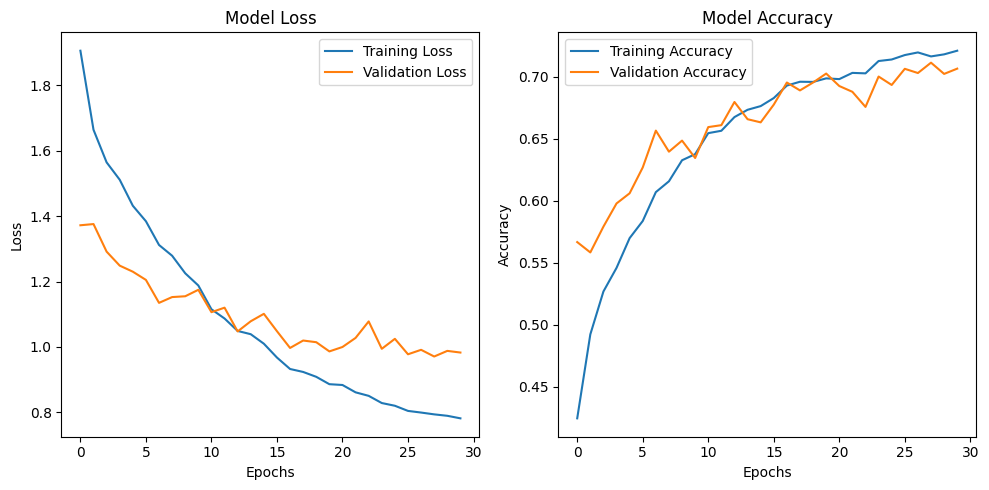

In [ ]:
import matplotlib.pyplot as plt

ig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Menampilkan subplot
plt.tight_layout()
plt.show()

In [ ]:
model.save('model_save_ml/ml_model_lstm.h5')

# Klasifikasi

In [ ]:
# Fungsi untuk melakukan prediksi pada data baru dengan probabilitas
def classify_new_data_with_prob(model, new_data):
    # Preprocess the input text
    processed_data = preprocess_new_data(new_data)
    
    # Lakukan prediksi menggunakan model (mendapatkan probabilitas untuk setiap kelas)
    predicted_probabilities = model.predict(processed_data)
    
    # Menentukan kelas dengan nilai probabilitas tertinggi
    predicted_class = np.argmax(predicted_probabilities, axis=1)
    
    # Decode label ke status
    predicted_label = label_encoder.inverse_transform(predicted_class)
    
    # Dapatkan probabilitas untuk kelas yang diprediksi
    max_probability = np.max(predicted_probabilities)
    
    # Menampilkan probabilitas untuk setiap label
    class_probabilities = dict(zip(label_encoder.classes_, predicted_probabilities[0]))
    
    return predicted_label[0], max_probability, class_probabilities

In [ ]:
# Input manual (data baru)
new_data = "hari ini saya merasa senang setelah berhasil mendapatkan nilai UAS yang sangat baik"

In [ ]:
# Klasifikasikan data baru dan dapatkan probabilitas
predicted_status, max_probability, class_probabilities = classify_new_data_with_prob(model, new_data)

# Tampilkan hasil prediksi dan probabilitas
print(f"Status yang diprediksi: {predicted_status}")
print(f"Probabilitas untuk status yang diprediksi: {max_probability:.4f}")
print("\nProbabilitas untuk setiap label:")
for status, prob in class_probabilities.items():
    print(f"{status}: {prob:.4f}")
